In [118]:
import random
import names
import matplotlib.pyplot as plt
%matplotlib inline 
#import mpld3
#mpld3.enable_notebook()

In [126]:
class Predictor(object):
    """
    The predictor attemps to guess what the generator will produce.
    He gains a point if he predicts accurately and looses one if he doesn't
    """
    def __init__(self):
        self.name = names.get_full_name()
        self.rules = []
        self.gameScore = 0
        self.lastScore = 0
        self.scores = []
        # make players start with some rules
    
    def getRules(self, ruleset):
        for i in xrange(0, random.randint(0,20)):
            key = random.choice(ruleset.keys())
            newrule = random.choice(ruleset[key])
            self.rules.append(newrule)
        self.rules.sort(lambda x,y: cmp(len(y[0]), len(x[0])))
        
    def predict(self, generator):
        
        def arequivalent(s, r):
            for i in xrange(0, len(s)):
                if s[i] != r[i] and r[i] != 'X':
                    return False
            return True
        
        
        gsequence = generator.sequence
        slength = len(gsequence)
        
        for rule in self.rules:
            rlength = len(rule[0])
            if slength >= rlength:
                seqchunk = gsequence[-rlength:]
                if arequivalent(seqchunk, rule[0]):
                    predicted = rule[1]
                    #print seqchunk, rule[0]
                    return predicted
        randpred = str(random.randint(0,1))
        #print "randomlypredicted"
        return randpred
    
    
    
    def predictorWins(self):
        self.gameScore += 1
        
    def newGame(self):
        self.scores.append(self.gameScore)
        self.lastScore = self.gameScore
        self.gameScore = 0
        
    def mutate(self):
        self.rules.append(random.choice(random.choice(possiblePreRules)) + '-' + str(random.randint(0,1)))
        del self.rules[random.randint(1,len(self.rules))-1]
        self.rules.sort(lambda x,y: cmp(len(y), len(x)))
        
    def crossover(self, secondParent):
        firstHalf = self.rules[0:len(self.rules)]
        secondHalf = secondParent.rules[len(secondParent.rules):]
        self.rules = firstHalf + secondHalf
        return self
        
                
        
    
    
def createAllPreRules(length):
    
    L = ['']
    for n in range(length):
        tmp = []
        for el in L:
            if random.random() < 0.9:
                tmp.append(el+'0')
            else:
                tmp.append(el+'X')

            if random.random() < 0.9:
                tmp.append(el+'1')
            else:
                tmp.append(el+'X')
            tmp.append('')
        L = tmp
    L = sorted(set(L))
    
    formRules = {}
    
    for i in xrange(length+1):
        formRules[str(i)] = []
        
    for i in L:
        formRules[str(len(i))].append((i, str(random.randint(0,1))))

    
    formRules.pop('0', None)
    return formRules

possiblePreRules = createAllPreRules(10)

In [127]:
"""pred = Predictor()
pred.getRules(possiblePreRules)

gen = Generator()
gen.getRules(possibleGenRules)
print "predrules ", pred.rules
print "genruless ", gen.rules

for i in range(100):
    g = gen.generate()
    p = pred.predict(gen)
    
gen.sequence"""

'pred = Predictor()\npred.getRules(possiblePreRules)\n\ngen = Generator()\ngen.getRules(possibleGenRules)\nprint "predrules ", pred.rules\nprint "genruless ", gen.rules\n\nfor i in range(100):\n    g = gen.generate()\n    p = pred.predict(gen)\n    \ngen.sequence'

In [128]:
class Generator(object):
    """
    The generator generates a string of 1's and 0's.
    If the predictor has accurately predicted his next element he looses a point, and if not he gains one
    """
    possibleRules = []
    
    def __init__(self):
        self.name = names.get_full_name()
        self.rules = []
        self.sequence = ''
        self.gameScore = 0
        self.lastScore = 0
        self.scores = []
        
    def generate(self):
        slength = len(self.sequence)
        for rule in self.rules:
            rlength = len(rule[0])
            if slength >= rlength:
                seqchunk = self.sequence[-rlength:]
                if seqchunk == rule[0]:
                    generated = rule[1]
                    self.sequence += generated
                    return generated
        randgen = str(random.randint(0,1))
        self.sequence += randgen
        #print "randomlygenerate"
        return randgen
        
    def getRules(self, ruleset):
        for i in xrange(0, random.randint(0,30)):
            key = random.choice(ruleset.keys())
            newrule = random.choice(ruleset[key])
            self.rules.append(newrule)
        self.rules.sort(lambda x,y: cmp(len(y[0]), len(x[0])))
        #print self.rules
        
    def generatorWins(self):
        self.gameScore += 1
        
    def newGame(self):
        self.scores.append(self.gameScore)
        self.lastScore = self.gameScore
        self.gameScore = 0
        
    def mutate(self):
        self.rules.append(random.choice(random.choice(possibleGenRules)) + '-' + str(random.randint(0,1)))
        del self.rules[random.randint(1, len(self.rules))-1]
        self.rules.sort(lambda x,y: cmp(len(y), len(x)))
        
    def crossover(self, secondParent):
        firstHalf = self.rules[0:len(self.rules)]
        secondHalf = secondParent.rules[len(secondParent.rules):]
        self.rules = firstHalf + secondHalf
        return self
        
            
def createAllGenRules(length):
    
    L = [""]
    for n in range(length):
        tmp = []
        for el in L:
            tmp.append(el+'0')
            tmp.append(el+'1')
            tmp.append('')
        L = tmp
        
    L = sorted(set(L))
    
    formRules = {}
    
    for i in xrange(length+1):
        formRules[str(i)] = []
        
    for i in L:
        formRules[str(len(i))].append((i, str(random.randint(0,1))))
    formRules.pop('0', None)
    return formRules

possibleGenRules = createAllGenRules(10)

In [129]:
"""gen = Generator()
gen.getRules(possibleGenRules)

for i in range(100):
    print gen.generate()
gen.sequence"""

'gen = Generator()\ngen.getRules(possibleGenRules)\n\nfor i in range(100):\n    print gen.generate()\ngen.sequence'

In [140]:
def playGame(numberOfPlayers, numOfGenerations):
    predictionTeam = []
    generationTeam = []
    
    genchampfitness = []
    prechampfitness = []
    
    genAvgfitness = []
    preAvgfitness = []
    
    for i in xrange(numberOfPlayers):
        newPred = Predictor()
        newPred.getRules(possiblePreRules)
        newGen = Generator()
        newGen.getRules(possibleGenRules)
        predictionTeam.append(newPred)
        generationTeam.append(newGen)
    PreChamp = random.choice(predictionTeam)
    GenChamp = random.choice(generationTeam)
    
    for generation in xrange(0, numOfGenerations):
        for move in xrange(0,100):
            championPrediction = PreChamp.predict(GenChamp)
            championGeneration = GenChamp.generate()
            for predPlayer in predictionTeam:
                playerPrediction = predPlayer.predict(GenChamp)
                if playerPrediction == championGeneration:
                    predPlayer.predictorWins()
            for genPlayer in generationTeam:
                playerGeneration = genPlayer.generate()
                if playerGeneration != championPrediction:
                    genPlayer.generatorWins()
                        

        predictionTeam = sorted(predictionTeam, key=lambda player: fitness(player) , reverse = True)
        generationTeam = sorted(generationTeam, key=lambda player: fitness(player) , reverse = True)
        
        PreChamp = predictionTeam[0]
        GenChamp = generationTeam[0]

        #for i in xrange(0, int(numberOfPlayers/2)):
        #    predictionTeam[i].mutate()
        #    generationTeam[i].mutate()

        #predictorsToXover = predictionTeam[int(numberOfPlayers/2):numberOfPlayers]
        #generatorsToXover = generationTeam[int(numberOfPlayers/2):numberOfPlayers]
        #for i in xrange(int(numberOfPlayers/2), numberOfPlayers):
        #    predictionTeam[i] = random.choice(predictorsToXover).crossover(random.choice(predictorsToXover))
        #    generationTeam[i] = random.choice(generatorsToXover).crossover(random.choice(generatorsToXover))

        #print "Predictor champion fitness : " + str(fitness(PreChamp))
        #print "Generator champion fitness : " + str(fitness(GenChamp))
        genchampfitness.append(fitness(PreChamp))
        prechampfitness.append(fitness(GenChamp))
        
        genAvgfitness.append(sum(fitness(player) for player in generationTeam)/len(generationTeam))
        preAvgfitness.append(sum(fitness(player) for player in predictionTeam)/len(predictionTeam))
        
        #for i in predictionTeam:
        #    print "GS : " + str(i.gameScore) + "    " + "LS : " + str(i.lastScore)
        #for i in generationTeam:
        #    print "GS : " + str(i.gameScore) + "    " + "LS : " + str(i.lastScore)
        
        print GenChamp.rules
        print PreChamp.rules
        for i in generationTeam:
            i.newGame()
        for i in predictionTeam:
            i.newGame()
        
        
    plt.plot(genchampfitness, label='Generator Champ Fitness')
    plt.plot(prechampfitness, label='Predictor Champ Fitness')
    plt.plot(genAvgfitness, label='Generator Average Fitness')
    plt.plot(preAvgfitness, label='Predictor Average Fitness')    
    plt.ylabel('Fitness')    
    plt.xlabel('Generation')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()
        # keep top x% players
        # mutate and Xover parents
        # get new Population
        # play again

In [141]:
def fitness(player): 
    return player.gameScore*0.7 + player.lastScore*0.3

[('0001001111', '1'), ('101110000', '1'), ('00110111', '0'), ('0110111', '0'), ('001001', '1'), ('000011', '1'), ('11000', '0'), ('01111', '0'), ('01100', '1'), ('0110', '1'), ('10', '1'), ('1', '0')]
[('001001X100', '1'), ('11110011X', '1'), ('11010011', '0'), ('1101101', '1'), ('01X111', '1'), ('0X0111', '1'), ('101X1', '1'), ('00', '0'), ('X', '0')]
[('0111110101', '0'), ('1010111011', '1'), ('0010111000', '0'), ('011000010', '1'), ('101011100', '0'), ('101110110', '1'), ('011001111', '1'), ('00111010', '1'), ('11001011', '0'), ('0001111', '0'), ('001000', '1'), ('11001', '0'), ('00000', '0'), ('10000', '1'), ('11001', '0'), ('11101', '1'), ('11101', '1'), ('00100', '1'), ('01100', '1'), ('00010', '1'), ('1100', '0'), ('1100', '0'), ('0010', '0'), ('1101', '1'), ('000', '1'), ('000', '1'), ('011', '1'), ('0', '1'), ('0', '1')]
[('001001X100', '1'), ('11110011X', '1'), ('11010011', '0'), ('1101101', '1'), ('01X111', '1'), ('0X0111', '1'), ('101X1', '1'), ('00', '0'), ('X', '0')]
[('1

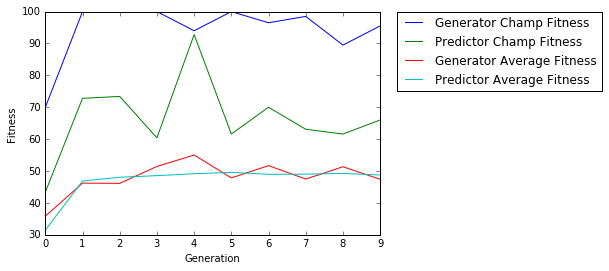

In [143]:
playGame(100,10)

In [146]:
L = ['']
for n in range(4):
    tmp = []
    for el in L:
        if random.random() < 0.9:
            tmp.append(el+'0')
        else:
            tmp.append(el+'X')
            
        if random.random() < 0.9:
            tmp.append(el+'1')
        else:
            tmp.append(el+'X')
        tmp.append('')
    L = tmp
L = sorted(set(L))
withpred = []  
for i in L:
    withpred.append((i, random.randint(0,1)))
    
print withpred

[('', 0), ('0', 1), ('00', 0), ('000', 1), ('0000', 0), ('0001', 1), ('001', 0), ('0010', 0), ('0011', 1), ('01', 1), ('010', 1), ('0101', 0), ('010X', 0), ('011', 1), ('0110', 0), ('0111', 1), ('0X', 1), ('1', 0), ('10', 0), ('100', 1), ('1000', 1), ('1001', 1), ('101', 0), ('1010', 0), ('1011', 0), ('11', 0), ('110', 0), ('1100', 0), ('1101', 0), ('111', 1), ('1110', 1), ('1111', 0), ('X', 0)]


In [147]:
L = ['']
for n in range(4):
    tmp = []
    for el in L:
        tmp.append(el+'0')
        tmp.append(el+'1')
        tmp.append('')
    L = tmp
L = sorted(set(L))
withpred = []  
for i in L:
    withpred.append((i, random.randint(0,1)))
    
print withpred

[('', 1), ('0', 1), ('00', 0), ('000', 0), ('0000', 0), ('0001', 0), ('001', 1), ('0010', 0), ('0011', 1), ('01', 1), ('010', 0), ('0100', 1), ('0101', 0), ('011', 0), ('0110', 0), ('0111', 1), ('1', 0), ('10', 0), ('100', 0), ('1000', 0), ('1001', 1), ('101', 0), ('1010', 1), ('1011', 0), ('11', 0), ('110', 1), ('1100', 1), ('1101', 1), ('111', 1), ('1110', 0), ('1111', 1)]


In [220]:
list1=1
list2=123
d={'a':[],'b':[]}
d['a'].append(list1)
d['b'].append(list2)
d['a'].append(list1)
d['b'].append(list2)
d['a'].append(list1)
d['b'].append(list2)
key = random.choice(d.keys())
d[key]
d.pop("a", None)
d

{'b': [123, 123, 123]}

In [45]:
for i in 'dfgfsgg':
    print i

d
f
g
f
s
g
g
